<a href="https://www.kaggle.com/code/nedadarbeheshti/grace-acc-linear-regression?scriptVersionId=131453007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In the GRACE data convention, accelerometer data is commonly abbreviated as ACC.

Read each daily file, for each satellite, GRACE A or GRACE B. Skip the header or 23 first rows in each file.

In [2]:
# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

In [3]:
grace_dir = Path('../input/grace-simulated-accelerometer-data')

In [4]:
df_A = pd.read_csv(grace_dir/'ACC1B_2005-05-02_A_MDC-02.asc',header=None, sep=' ', skiprows=23)
df_B = pd.read_csv(grace_dir/'ACC1B_2005-05-02_B_MDC-02.asc',header=None, sep=' ', skiprows=23)

In [5]:
df_B.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,168264000,B,-5.646727e-07,0.000008,-8.601977e-07,6.994885e-08,5.632299e-09,2.823088e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
1,168264005,B,-5.646549e-07,0.000008,-8.602315e-07,1.154125e-07,8.717490e-09,-3.230312e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
2,168264010,B,-5.646940e-07,0.000008,-8.602842e-07,5.439301e-08,9.099131e-09,-1.780208e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
3,168264015,B,-5.646751e-07,0.000008,-8.602696e-07,-1.580365e-07,1.069097e-08,1.659535e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
4,168264020,B,-5.646651e-07,0.000008,-8.602738e-07,-4.511358e-08,-5.024903e-10,1.291743e-08,3.918335e-11,1.052714e-09,3.988111e-11,0


just keep linear ACC

In [6]:
df_A.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)
df_B.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)

In [7]:
df_B.head()

,0,2,3,4
0,168264000,-5.646727e-07,0.000008,-8.601977e-07
1,168264005,-5.646549e-07,0.000008,-8.602315e-07
2,168264010,-5.646940e-07,0.000008,-8.602842e-07
3,168264015,-5.646751e-07,0.000008,-8.602696e-07
4,168264020,-5.646651e-07,0.000008,-8.602738e-07


 # Fit a time-step feature for each axis for GRACE B

In [8]:
# Create a time dummy
time =  np.arange(len(df_B.index))

df_B['time'] = time 

# Create training data
X = df_B.loc[:, ['time']]  # features
y_x = df_B.loc[:, 2]  # target
y_y = df_B.loc[:, 3]  # target
y_z = df_B.loc[:, 4]  # target

# Train the model
model = LinearRegression()
model.fit(X, y_x)

# Store the fitted values as a time series with the same time index as
# the training data
y_xpred = pd.Series(model.predict(X), index=X.index)

model.fit(X, y_y)
y_ypred = pd.Series(model.predict(X), index=X.index)

model.fit(X, y_z)
y_zpred = pd.Series(model.predict(X), index=X.index)

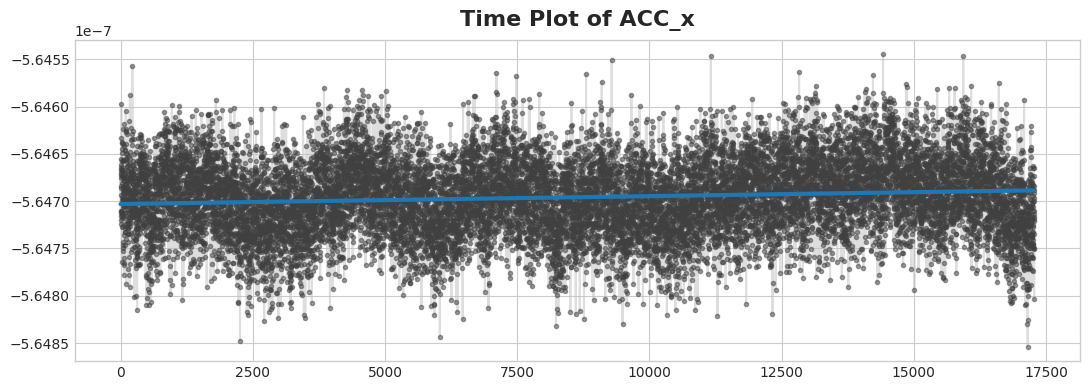

In [9]:
ax = y_x.plot(**plot_params, alpha=0.5)
ax = y_xpred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of ACC_x');

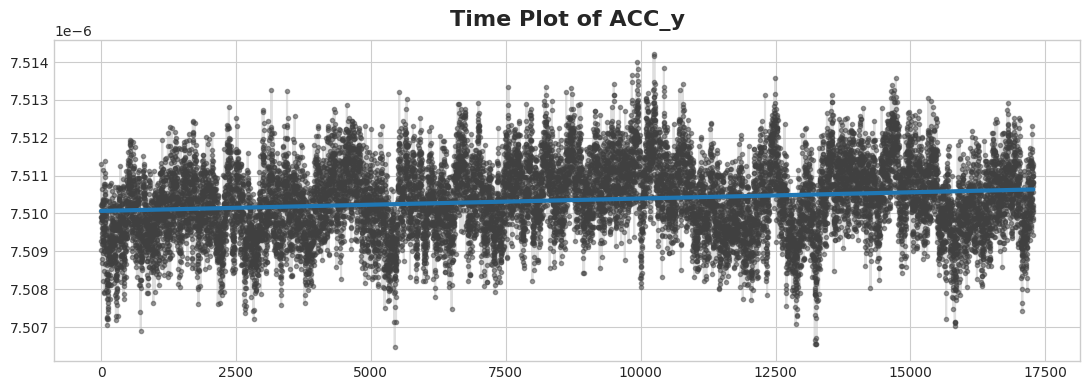

In [10]:
ax = y_y.plot(**plot_params, alpha=0.5)
ax = y_ypred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of ACC_y');

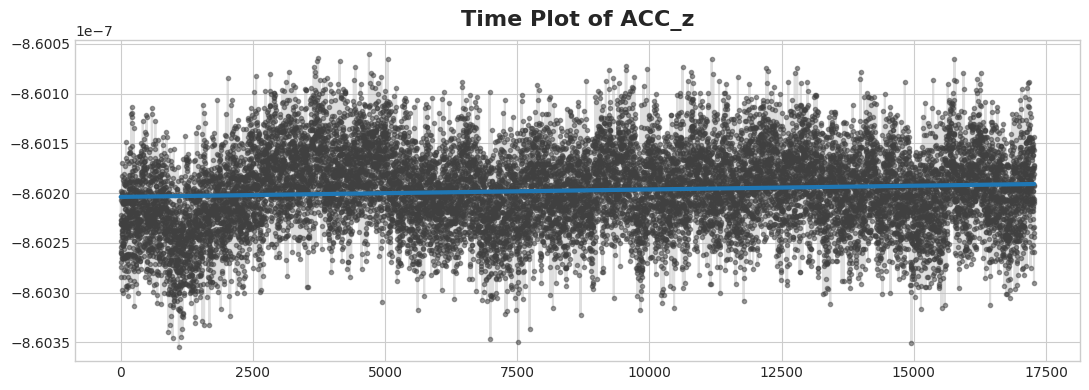

In [11]:
ax = y_z.plot(**plot_params, alpha=0.5)
ax = y_zpred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of ACC_z');

# Fit a lag feature for each axis for GRACE B

In [12]:
# Create a lag feature from the target 'sales'
lag_1x = df_B[2].shift(1)
lag_1y = df_B[3].shift(1)
lag_1z = df_B[4].shift(1)

df_B['lag_1x'] = lag_1x  # add to dataframe
df_B['lag_1y'] = lag_1y  # add to dataframe
df_B['lag_1z'] = lag_1z  # add to dataframe

X = df_B.loc[:, ['lag_1x']].dropna()  # features
y = df_B.loc[:, 2]  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X, y)
# Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

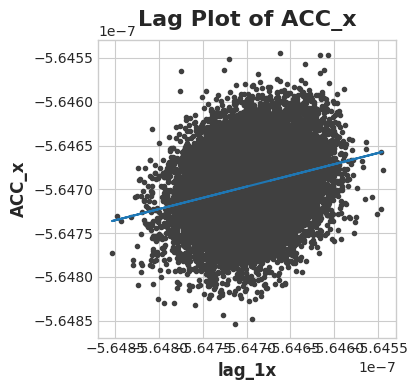

In [13]:
fig, ax = plt.subplots()
ax.plot(X['lag_1x'], y, '.', color='0.25')
ax.plot(X['lag_1x'], y_pred)
ax.set(aspect='equal', ylabel='ACC_x', xlabel='lag_1x', title='Lag Plot of ACC_x');

In [14]:
X = df_B.loc[:, ['lag_1y']].dropna()  # features
y = df_B.loc[:, 3]  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X, y)
# Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

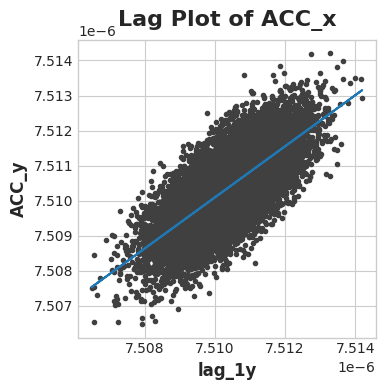

In [15]:
fig, ax = plt.subplots()
ax.plot(X['lag_1y'], y, '.', color='0.25')
ax.plot(X['lag_1y'], y_pred)
ax.set(aspect='equal', ylabel='ACC_y', xlabel='lag_1y', title='Lag Plot of ACC_x');

In [16]:
X = df_B.loc[:, ['lag_1z']].dropna()  # features
y = df_B.loc[:, 4]  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X, y)
# Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

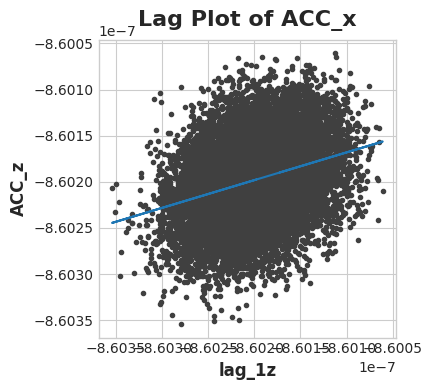

In [17]:
fig, ax = plt.subplots()
ax.plot(X['lag_1z'], y, '.', color='0.25')
ax.plot(X['lag_1z'], y_pred)
ax.set(aspect='equal', ylabel='ACC_z', xlabel='lag_1z', title='Lag Plot of ACC_x');